In [1]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [2]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST('../../data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64)
val_set = datasets.MNIST('../../data', train=False, transform=transform)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1000)

/home/javier/workspace/nn_distributed_training/venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
def init_mnist_grid(axs, dataset, inds):
    nrows, ncols = axs.shape
    bwidth = 2
    
    for i in range(nrows):
        for j in range(ncols):
            raw_img = dataset[inds[i, j]][0].reshape(28, 28)
            axs[i, j].imshow(raw_img, cmap="gray")
            axs[i, j].set_xticklabels([])
            axs[i, j].set_xticks([])
            axs[i, j].set_yticklabels([])
            axs[i, j].set_yticks([])

def update_borders(axs, correct):
    nrows, ncols = axs.shape
    bwidth = 2
    
    for i in range(nrows):
        for j in range(ncols):
            if correct[i, j]:
                bcolor = "green"
            else:
                bcolor = "red"
                
            for spine in axs[i, j].spines.values():
                spine.set_edgecolor(bcolor)
                spine.set_linewidth(5)

    return


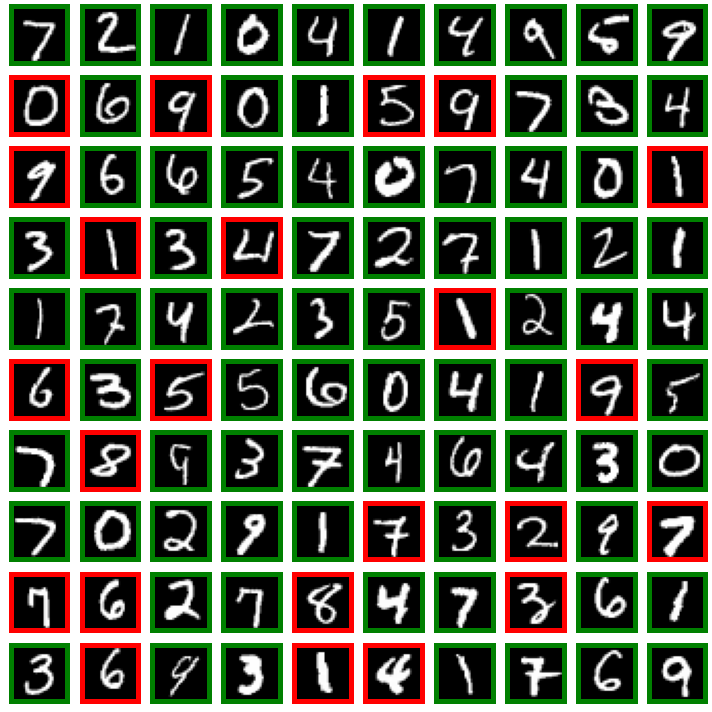

In [4]:
grid_shape = (10, 10)
inds = torch.arange(0, 100).reshape(grid_shape)
num_frames = 10

(fig, axs) = plt.subplots(nrows=grid_shape[0], ncols=grid_shape[1], figsize=(10, 10), tight_layout=True)

def draw(i):
    correct = torch.randn(grid_shape) < 0.8
    update_borders(axs, correct)

mnist_anim = anim.FuncAnimation(fig, draw, frames=num_frames, repeat=False, init_func=init_mnist_grid(axs, val_set, inds)) 
mnist_anim.save("random_grid.mp4")